# TREND ANALYSIS OF THE U.S. IMPORTS FOR CONSUMPTION OF STEEL PRODUCTS - CODE
## Group 22: 
### Chengchen Luo ; Liya Li ; Xiaotong Ding ; Xiaoxi Liu

## Data Munging

In [1]:
# library preppared
import os
import os.path
import pandas as pd
import numpy as np
import plotnine as p9
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import sklearn.model_selection as sk
import statistics
import scipy.stats as st
from datetime import datetime
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from sklearn import svm
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'pandas'

In [2]:
# define path
path1 = 'C:\\Users\\Brook\\Documents\\Documents\\Course\\STA 141B\\Final\\data_country\\'
path2 = 'C:\\Users\\Brook\\Documents\\Documents\\Course\\STA 141B\\Final\\data_product\\'

In [3]:
# extract xls files
files1 = os.listdir(path1)
files1_xls = [f for f in files1 if f[-3:] == 'xls']
files2 = os.listdir(path2)
files2_xls = [f for f in files2 if f[-3:] == 'xls']

In [4]:
# initialize dataframe
data_c = pd.DataFrame()
# create dataframe
for f in files1_xls:
    data = pd.read_excel(f)
    data = data[['Not Seasonally Adjusted','Unnamed: 5','Unnamed: 6']]
    data = data.iloc[13:,:]
    data.columns= ['Country_Area', 'Quantity', 'Value']
    data['year'] = f[0:4]
    data['month'] = f[4:6]
    data_c = data_c.append(data)

# data cleaning
data_c = data_c.dropna()
data_c = data_c.reset_index()
data_c = data_c.replace('(-)', np.NaN)
#data_c.to_csv('country_import.csv')

In [5]:
# initialize dataframe
data_p = pd.DataFrame()
# create dataframe
for f in files2_xls:
    data = pd.read_excel(f)
    data = data[['Not Seasonally Adjusted', 'Unnamed: 5','Unnamed: 6']]
    data = data.iloc[13:,:]
    data.columns= ['Product', 'Quantity', 'Value']
    data['date'] = f[-8:-4]
    data_p = data_p.append(data)

# data cleaning
data_p = data_p.dropna()
data_p = data_p.reset_index()
data_p = data_p.replace('(-)', np.NaN)
#data_p.to_csv('all_steel_product.csv')

In [6]:
# cleaned dataFrame
datc = pd.read_csv('C:\\Users\\Brook\\Documents\\Documents\\Course\\STA 141B\\Final\\country_import.csv')
datc = datc.drop(columns= ['Unnamed: 0', 'index'])
datp = pd.read_csv('C:\\Users\\Brook\\Documents\\Documents\\Course\\STA 141B\\Final\\all_steel_product.csv')
datp = datp.drop(columns= ['Unnamed: 0', 'index'])

In [7]:
def label_year(row):
    if row['date'] < 1400:
        return 2013
    elif row['date'] < 1500:
        return 2014
    elif row['date'] < 1600:
        return 2015
    elif row['date'] < 1700:
        return 2016
    elif row['date'] < 1800:
        return 2017
    else:
        return 2018
    
def label_month(row):
    return row['date'] % 100

In [8]:
datp['year'] = datp.apply (lambda row: label_year(row),axis=1)
datp['month'] = datp.apply (lambda row: label_month(row),axis=1)

In [9]:
datc['day'] = 15
datc['date'] = datc.apply(lambda row: datetime(row['year'], row['month'], row['day']), axis=1)
datp['day'] = 15
datp['date'] = datp.apply(lambda row: datetime(row['year'], row['month'], row['day']), axis=1)
datc['price'] = datc['Value'] / datc['Quantity']
datp['price'] = datp['Value'] / datp['Quantity']

In [10]:
datp.to_csv('p.csv')
datc.to_csv('c.csv')

In [11]:
Ar = ['North America','Europe','Pacific Rim Countries','South/Central America','Other Countries']
Cr = ['Canada','Mexico','Austria','America','Belgium','Czech Republic','Finland','France','Germany','Italy','Netherlands',\
      'Poland','Spain','Sweden','United Kingdom','Other EU','Other Europe','Norway','Russia','Switzerland','Turkey',\
      'Ukraine','Australia','China','Indonesia','Japan','Hong Kong','Korea','Singapore','Taiwan','Argentina','Brazil',\
      'Chile','Colombia','Venezuela','Other S/C America','India','South Africa','Thailand','Other']

## Part 1: Exploring Data

### 1.1 Area of the world and import 

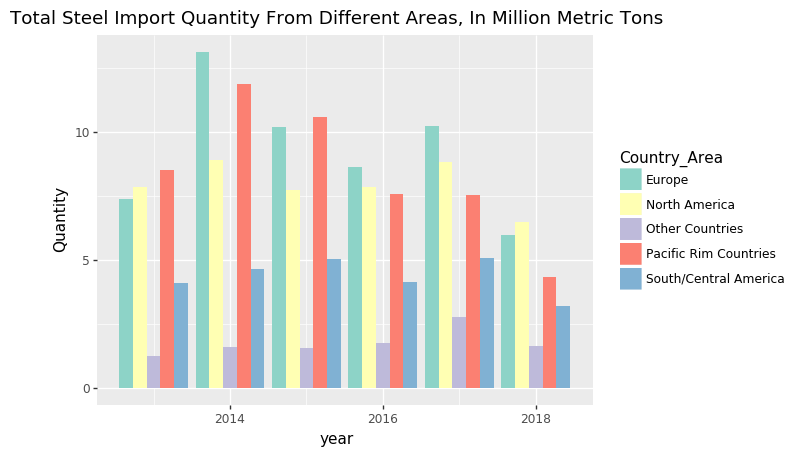

<ggplot: (122712015329)>

In [12]:
df1_1 = datc.loc[datc['Country_Area'].isin(Ar)]
df1_1 = df1_1[['Country_Area','Quantity','Value','year']]
df1_1 = pd.DataFrame(df1_1.groupby(['Country_Area','year']).sum()/1000000).reset_index()

# Plot: quantity and area
gg1_1_a = p9.ggplot(df1_1) + p9.aes(x='year', y = 'Quantity', fill='Country_Area') 
gg1_1_a += p9.geom_bar(stat = 'identity',position = 'dodge')
gg1_1_a += p9.ggtitle('Total Steel Import Quantity From Different Areas, In Million Metric Tons') 
gg1_1_a += p9.scale_fill_brewer('qual', palette=8)
gg1_1_a

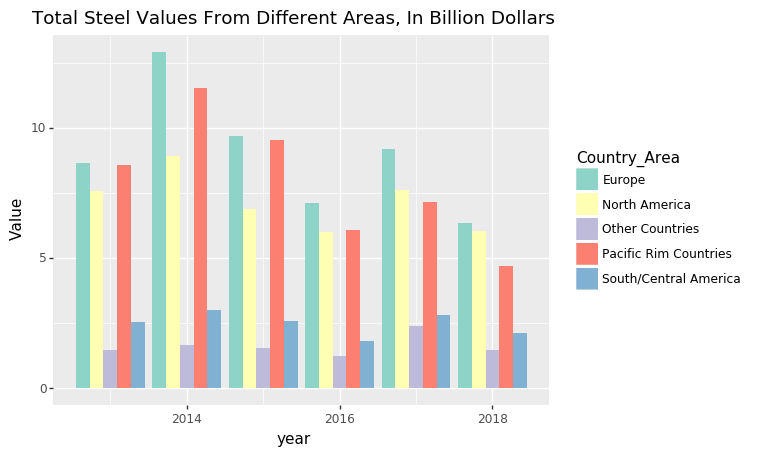

<ggplot: (122711971592)>

In [13]:
# Plot: value and area
gg1_1_b = p9.ggplot(df1_1) + p9.aes(x='year', y = 'Value', fill='Country_Area') 
gg1_1_b += p9.geom_bar(stat = 'identity',position = 'dodge')
gg1_1_b += p9.ggtitle('Total Steel Values From Different Areas, In Billion Dollars') 
gg1_1_b += p9.scale_fill_brewer('qual', palette=8)
gg1_1_b

### 1.2 Top 10 exporters

In [14]:
df = datc.loc[datc['Country_Area'].isin(Cr)]
df = df[['Country_Area','Quantity','Value','year']]
df = pd.DataFrame(df.groupby(['Country_Area','year']).sum()/1000000).reset_index()

df1_2 = pd.DataFrame()
for i in range(2013,2019):
    data = df.loc[df['year'] == i]
    data = data.sort_values(by=['year', 'Quantity'],ascending = False)
    data = data.iloc[0:10, :]
    df1_2 = df1_2.append(data)

# Plot: top 10 exporting countries and areas, 2014-2018
def plt_top_10(year):
    title = 'Steel Import Quantity from Top 10 exporters In Million Metric Tons, ' + str(year)
    data = df1_2.loc[df1_2['year'] == year]
    gg = p9.ggplot(data) + p9.aes(x='Country_Area', y = 'Quantity', fill='Country_Area')
    gg += p9.geom_bar(stat = 'identity',position = 'dodge') 
    gg += p9.ggtitle(title) 
    gg += p9.scale_fill_brewer('qual', palette=8)
    return gg

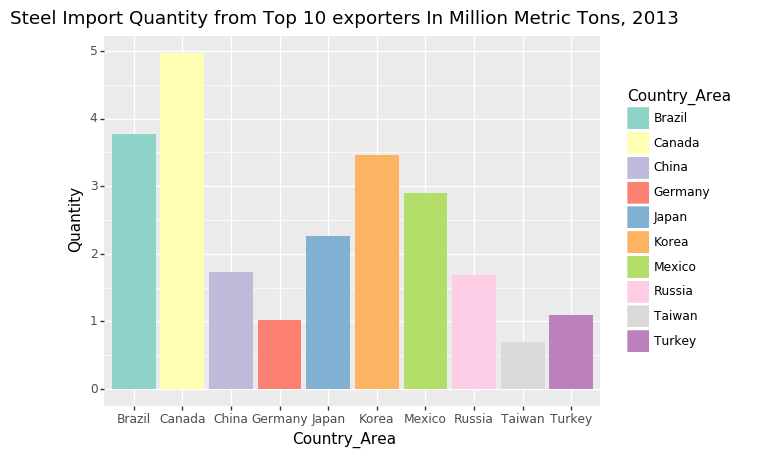

<ggplot: (122711971718)>

In [15]:
# Plot: 2013
plt_top_10(2013)

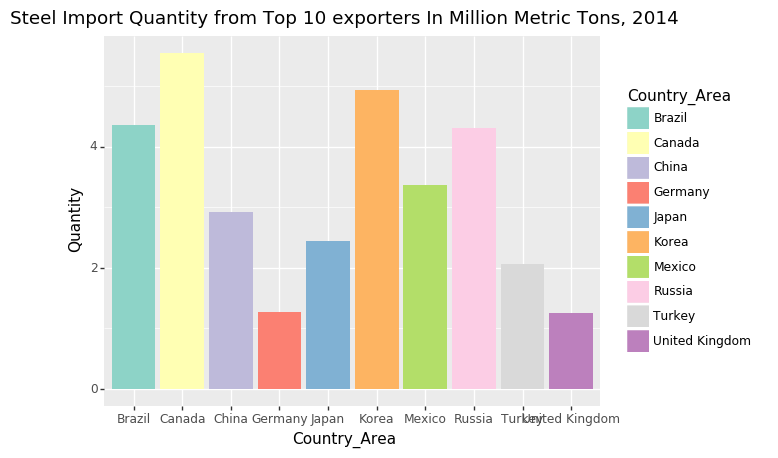

<ggplot: (122712303112)>

In [16]:
# Plot: 2014
plt_top_10(2014)

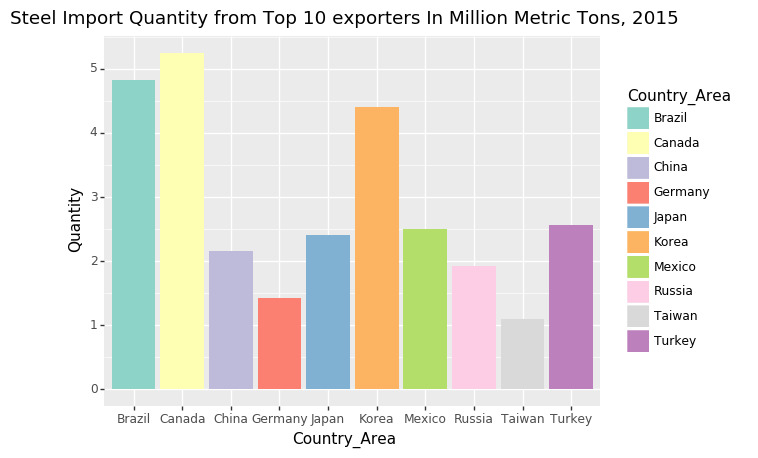

<ggplot: (-9223371914142678654)>

In [17]:
# Plot: 2015
plt_top_10(2015)

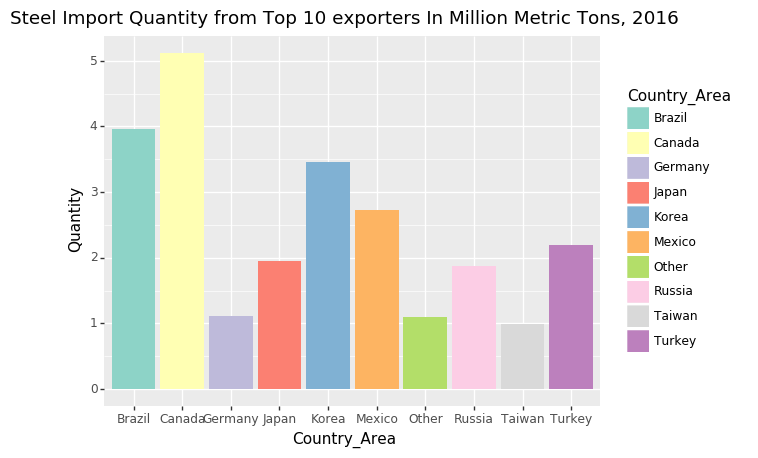

<ggplot: (122712510777)>

In [18]:
# Plot: 2016
plt_top_10(2016)

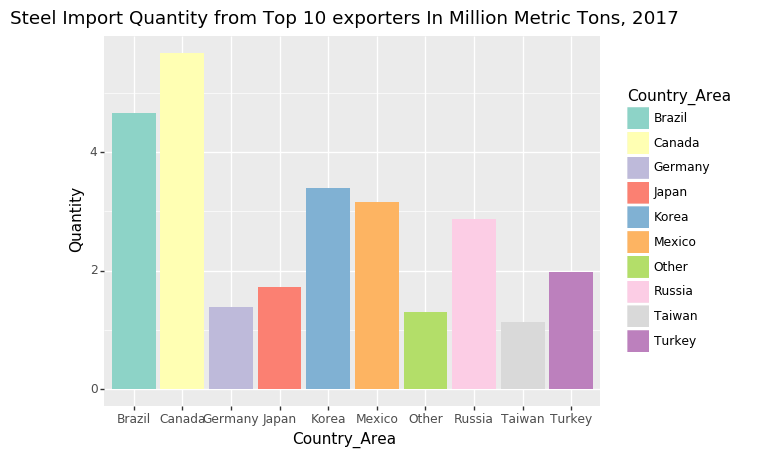

<ggplot: (122712737740)>

In [19]:
# Plot: 2017
plt_top_10(2017)

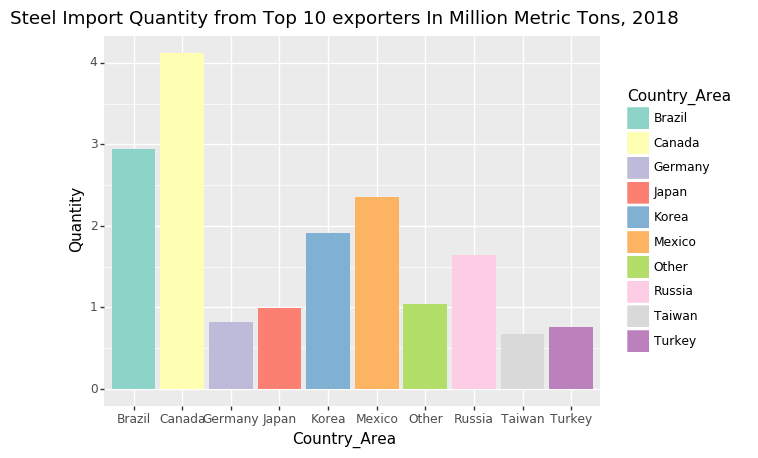

<ggplot: (122712734258)>

In [20]:
# Plot: 2018
plt_top_10(2018)

In [21]:
df1_2['Country_Area'].unique()

array(['Canada', 'Brazil', 'Korea', 'Mexico', 'Japan', 'China', 'Russia',
       'Turkey', 'Germany', 'Taiwan', 'United Kingdom', 'Other'],
      dtype=object)

### 1.3 Steel quantity trend

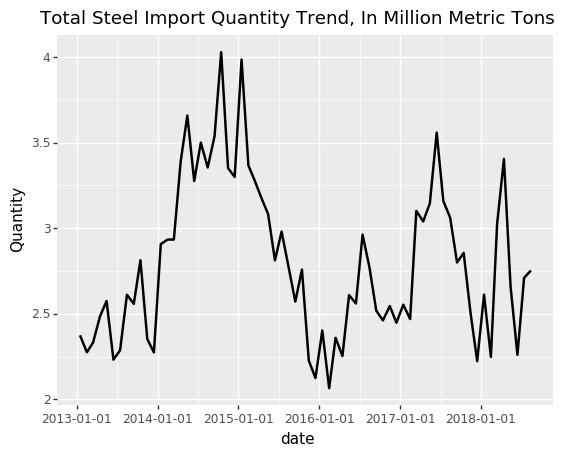

<ggplot: (122711954373)>

In [22]:
df1_3 = datc.loc[datc['Country_Area']=='Total Census Basis']
df1_3['Quantity'] = df1_3['Quantity']/1000000

# Plot
gg1_3 = p9.ggplot(df1_3) + p9.aes(x='date', y = 'Quantity') 
gg1_3 += p9.geom_line(size = 1)
gg1_3 += p9.ggtitle('Total Steel Import Quantity Trend, In Million Metric Tons') 
gg1_3


In [23]:
df1_3.groupby(['year']).sum().reset_index()

,year,Quantity,Value,month,day,price
0,2013,29.166805,28812583.0,78,180,11.872392
1,2014,40.175788,37976194.0,78,180,11.350626
2,2015,35.143597,30230033.0,78,180,10.232881
3,2016,29.956616,22253387.0,78,180,8.936720
4,2017,34.472508,29138335.0,78,180,10.182537
5,2018,21.670173,20642798.0,36,120,7.643261


### 1.4 Steel price trend

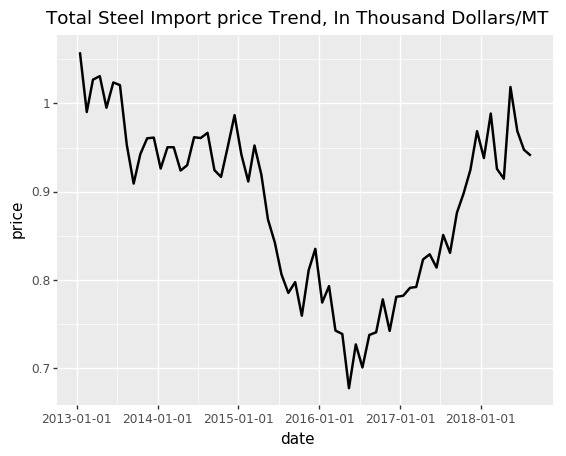

<ggplot: (-9223371914141772726)>

In [24]:
df1_4 = datc.loc[datc['Country_Area']=='Total Census Basis']

# Plot
gg1_4 = p9.ggplot(df1_4) + p9.aes(x='date', y = 'price') 
gg1_4 += p9.geom_line(size = 1)
gg1_4 += p9.ggtitle('Total Steel Import price Trend, In Thousand Dollars/MT') 
gg1_4

In [25]:
df1_4.groupby(['year']).sum().reset_index()

,year,Quantity,Value,month,day,price
0,2013,29166805.0,28812583.0,78,180,11.872392
1,2014,40175788.0,37976194.0,78,180,11.350626
2,2015,35143597.0,30230033.0,78,180,10.232881
3,2016,29956616.0,22253387.0,78,180,8.936720
4,2017,34472508.0,29138335.0,78,180,10.182537
5,2018,21670173.0,20642798.0,36,120,7.643261


### 1.5 relationship between quantity and value

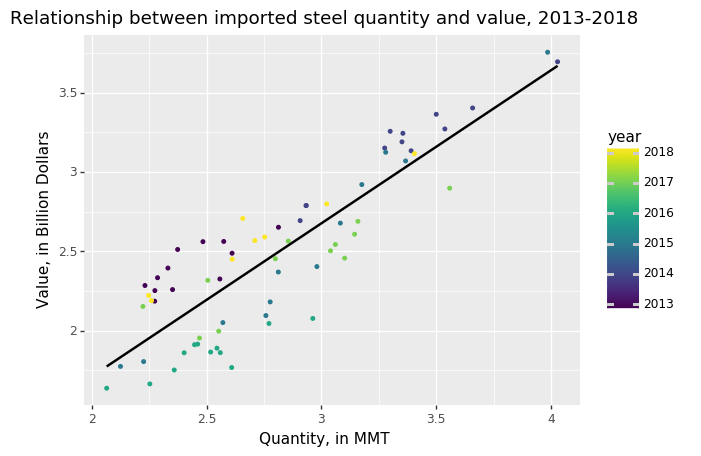

<ggplot: (122713003086)>

In [26]:
# Part 1.5: relationship between quantity and value
df1_5 = datc.loc[datc['Country_Area']=='Total Census Basis']
df1_5 = df1_5[['Value','Quantity','year']]
df1_5['Value'] = df1_5['Value']/1000000
df1_5['Quantity'] = df1_5['Quantity']/1000000

# Plot
gg1_5 = p9.ggplot(df1_5) + p9.aes(x='Quantity', y = 'Value', color ='year') 
gg1_5 += p9.geom_point(size = 1) 

gg1_5 += p9.ggtitle('Relationship between imported steel quantity and value, 2013-2018') 
gg1_5 += p9.xlab('Quantity, in MMT') + p9.ylab('Value, in Billion Dollars')
gg1_5 += p9.geom_smooth(method = 'lm',se = False)
gg1_5

## Part 2 Statistical Testing

### In March, 2018, Trump administration imposed tariffs on steel (25%) from most countries.The major goal of this section is to test whether this policy affects the steel products' quantity and price.

### 2.1 Does import quantity decrease since the tariff has been imposed?

### H0: mean(quantity before 3/2018) = mean(quantity after 3/2018)

### Ha: mean(quantity before 3/2018) > mean(quantity after 3/2018)

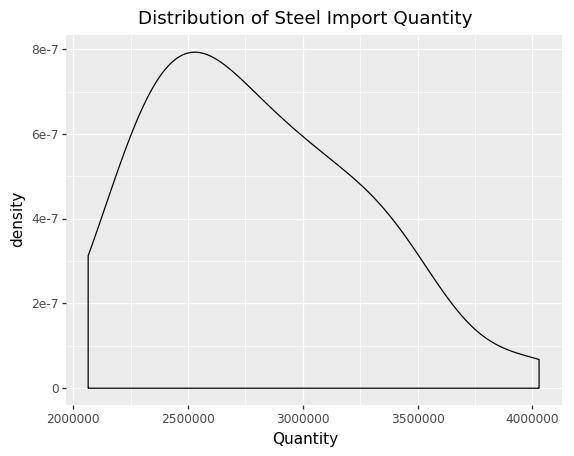

<ggplot: (-9223371914141772663)>

In [27]:
df2_1 = datp.loc[datp['Product'] == 'Total Selected Commodities' ]

# Check if quantity is normally distributed
gg2_1 = p9.ggplot(df2_1) + p9.aes(x='Quantity') 
gg2_1 += p9.geom_density() 
gg2_1 += p9.ggtitle('Distribution of Steel Import Quantity') 
gg2_1

In [28]:
# since it is not normally distributed, and sample size is small, permutaion test is used. Significance level: 0.05
bf = np.array(df2_1.iloc[:62,1])
af = np.array(df2_1.iloc[62:,1])
theta_hat = bf.mean() - af.mean()
theta_hat

1102.1666666665114

In [29]:
def permu_test(pooled,sizeZ,sizeY):
    np.random.shuffle(pooled)
    starZ = pooled[:sizeZ]
    starY = pooled[-sizeY:]
    return starZ.mean() - starY.mean()

def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

In [30]:
nCr(68,6) # since this is big, reduce iteration to 100,000

109453344.0

In [31]:
pooled = np.hstack([bf,af])

est = []

for i in range(0,100000):
    a = permu_test(pooled,bf.size,af.size)
    est.append(a)
    
count = 0
for j in range(0,100000):
    if est[j] >= theta_hat:
        count += 1

print(count)

pval = count / 100000

print(pval)

51701
0.51701


Since the p-value is greater than significance level, we can not reject H0 at 0.05. Therefore, there's not significant evidence to claim that the tariff in March 2018 made the import quantity decrease.

### 2.2 Does mean price increase since the 2018, march tariff has been imposed?

### H0: mean(price before 3/2018) = mean(price after 3/2018)

### Ha: mean(price before 3/2018) < mean(price after 3/2018)

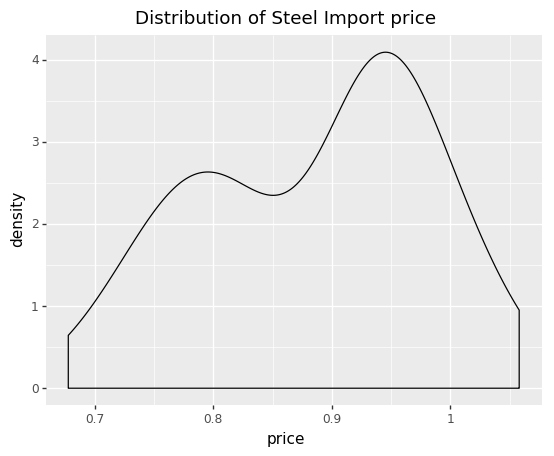

<ggplot: (-9223371914142305122)>

In [32]:
# Check if value is normally distributed
gg2_2 = p9.ggplot(df2_1) + p9.aes(x='price') 
gg2_2 += p9.geom_density() 
gg2_2 += p9.ggtitle('Distribution of Steel Import price') 
gg2_2

In [33]:
# since it is not normally distributed, and sample size is small, permutaion test is used. Significance level: 0.05
bf2 = np.array(df2_1.iloc[0:62,-1])
af2 = np.array(df2_1.iloc[62:,-1])
theta_hat2 = bf2.mean() - af2.mean()
theta_hat2

-0.07368314793990483

In [34]:
pooled2 = np.hstack([bf2,af2])

est2 = []

for i in range(0,100000):
    a = permu_test(pooled2,bf2.size,af2.size)
    est2.append(a)
    
count2 = 0
for j in range(0,100000):
    if est2[j] <= theta_hat2:
        count2 += 1

print(count2)

pval2 = count2 / 100000

print(pval2)

3038
0.03038


Since the p-value is smaller than significance level, we reject H0 at 0.05. Therefore, we claim that the tariff in March 2018 made the steel price increase.

From the 2 tests we can see that the new tariffs on steel since March 2018 did not affect the total import quantity of steel products, but the unit price did increase, which means we are spending more on the same quantity of products. Thus We need to consider time when we try to predict the future price. 

### 2.3 Do exporting areas affect price?

### Let mean prices of different exporters be u1, u2, ....u5

### H0: u1 = u2 = ... = u5

### Ha: otherwise

In [35]:
# use Kruskal-Wallis Test. Significance level: 0.05
df2_3 = datc.loc[datc['Country_Area'].isin(Ar)]

In [36]:
df2_3 = df2_3[['Country_Area','price']]

l = []
for c in Ar:
    dd = df2_3[df2_3['Country_Area'] == c]
    dd = dd['price']
    ll = list(dd)
    l.append(ll)
    
st.kruskal(l[0],l[1],l[2],l[3],l[4])

KruskalResult(statistic=167.0228055450827, pvalue=4.553799555189723e-35)

Since p-value is very small, we reject H0. Thus we can claim that different exproting area has different price, and we need to consider that when we predict the price. 

## Part 3 Classification

### 3.1 Reason for classification

In [37]:
l_eno = ['Europe','North America','Pacific Rim Countries' ]

def label_ara(data):
    for i in range(data.shape[0]):
        if data.iloc[i,1] in l_eno:
            data.iloc[i,-1] = 'ENP'
        elif data.iloc[i,1] == 'Other Countries':
            data.iloc[i,-1] = 'OC'
        else:
            data.iloc[i,-1] = 'SCA'
    return data    

In [38]:
df4_1 = datc.loc[datc['Country_Area'].isin(Ar)]
df4_1 = df4_1.reset_index()

In [39]:
df4_1['label'] = 0
df4_1 = label_ara(df4_1)

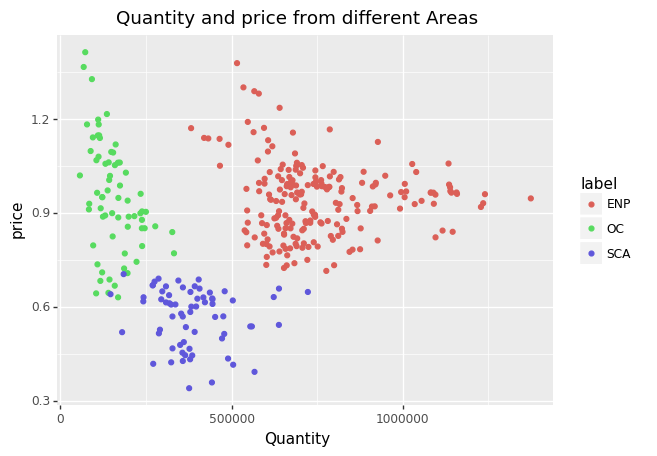

<ggplot: (122712303245)>

In [40]:
gg4_1 = p9.ggplot(df4_1) + p9.aes(x='Quantity', y='price', color = 'label') 
gg4_1 += p9.geom_point() 
gg4_1 += p9.ggtitle('Quantity and price from different Areas') 
gg4_1

Different areas have different quantities and price. Given a quantity, we want to classify its area and determine the price.

### 3.2 Classifier Selection

In [41]:
aa = df4_1[['Quantity','Value', 'year','month','label']]

In [42]:
x = aa[['Quantity','Value', 'year','month']]
y = aa[['label']]

In [43]:
validation_size = 0.20
seed = 10
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = validation_size, random_state = seed)

#### 3.2.1 Logistic Regression

In [44]:
clf = LogisticRegression(solver='liblinear', multi_class='ovr').fit(x_train, y_train)
print("Logistic Regression: ")
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Logistic Regression: 
Training Set Accuracy: 0.9963235294117647
Testing Set Accuracy: 0.9705882352941176


#### 3.2.2 LDA: linear discriminant analysis

In [45]:
clf = LinearDiscriminantAnalysis().fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 0.9742647058823529
Testing Set Accuracy: 0.9558823529411765


#### 3.2.3 SVM: support vector machine

In [46]:
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 0.9963235294117647
Testing Set Accuracy: 0.9705882352941176


#### 3.2.4 Decision Tree

In [47]:
clf = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0).fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 1.0
Testing Set Accuracy: 0.9705882352941176


#### 3.2.5 K-nearest Neighbor

In [48]:
clf = KNeighborsClassifier(n_neighbors=90).fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 0.9375
Testing Set Accuracy: 0.9558823529411765


#### 3.2.6 Random Forest

In [49]:
clf = RandomForestClassifier(n_estimators=50, random_state=0).fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 1.0
Testing Set Accuracy: 0.9852941176470589


#### 3.2.7 Adaboost

In [50]:
clf = AdaBoostClassifier().fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 0.8786764705882353
Testing Set Accuracy: 0.8676470588235294


#### 3.2.8 Quadratic Discrimative Analysis

In [51]:
clf = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 0.9889705882352942
Testing Set Accuracy: 0.9852941176470589


#### 3.2.9 Boosting Gradient Descend

In [52]:
clf = GradientBoostingClassifier(n_estimators=10, random_state=0).fit(x_train, y_train)
print("Training Set Accuracy: " + str(clf.score(x_train, y_train)))
print("Testing Set Accuracy: " + str(clf.score(x_test, y_test)))

Training Set Accuracy: 0.9926470588235294
Testing Set Accuracy: 0.9852941176470589


#### 3.2.10 Best Classifer

In [53]:
# Try 10-fold cross validation to evaluate classification model for model selection
# X: features
# Y: predicting variable

accuracies = []
results = {}
models = [('LR', LogisticRegression(solver='liblinear', multi_class='ovr')), 
          ('LDA', LinearDiscriminantAnalysis()), 
          ('SVM', svm.SVC(kernel='linear', C=1)),
          ('KNN', KNeighborsClassifier(n_neighbors=30)), 
          ('CART', DecisionTreeClassifier(max_leaf_nodes=90, random_state=0)),
          ("RF", (RandomForestClassifier(n_estimators=90, random_state=5))),
          ('Adaboost', (AdaBoostClassifier(learning_rate= 0.1, n_estimators= 90))), 
          ('QDA', (QuadraticDiscriminantAnalysis())),
          ('BGD', (GradientBoostingClassifier(n_estimators=25, random_state=0)))]

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy').mean()
    accuracies.append(cv_results)
    results[cv_results] = name
    print(name + ": " + str(cv_results))
print("--------------------\nBest Model is:")
print(results[max(accuracies)] + ": " + str(max(accuracies)))

LR: 0.9911764705882353
LDA: 0.95
SVM: 0.9911764705882353
KNN: 0.9588235294117646
CART: 0.9588235294117649
RF: 0.9705882352941178
Adaboost: 0.8235294117647058
QDA: 0.9617647058823531
BGD: 0.9647058823529411
--------------------
Best Model is:
SVM: 0.9911764705882353


By the accuracy, the best classifier is SVM. 

### 3.3 Confusion Matrix

In [54]:
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
ypred = clf.predict(x_test)

In [55]:
cm = confusion_matrix(y_test, ypred)

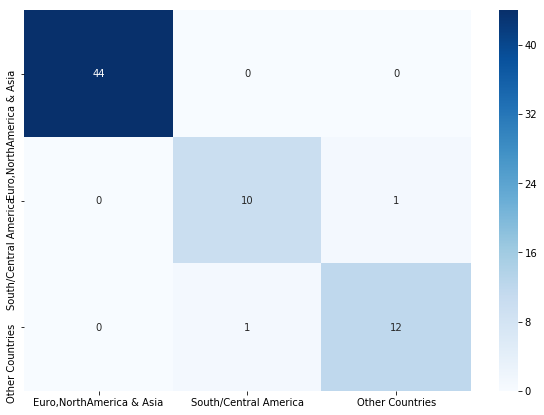

In [56]:
labels = ['Euro,NorthAmerica & Asia','South/Central America','Other Countries']

df_cm = pd.DataFrame(cm, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, cmap="Blues")

## Part 4 Price Prediction: Model Selection

### 4.1 Outlier Detection

In [57]:
dato = df4_1

In [58]:
print(dato.columns.values)
print(dato.shape)

['index' 'Country_Area' 'Quantity' 'Value' 'year' 'month' 'day' 'date'
 'price' 'label']
(340, 10)


In [59]:
display(dato.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 10 columns):
index           340 non-null int64
Country_Area    340 non-null object
Quantity        340 non-null float64
Value           340 non-null float64
year            340 non-null int64
month           340 non-null int64
day             340 non-null int64
date            340 non-null datetime64[ns]
price           340 non-null float64
label           340 non-null object
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 26.6+ KB


None

In [60]:
dato.isnull().values.any() # there is no NaN's in the dataframe

False

In [61]:
# convert steel-type(grouping) strings to categorical and find the according codes
categ_grouping = dato['label'].astype('category')   
Grouping_code = categ_grouping.cat.codes 
Grouping_code += 1

# add Grouping_code to newdata_no_outliers
dato['Grouping_code'] = Grouping_code
dato = dato.reset_index()
dato.head()

,level_0,index,Country_Area,Quantity,Value,year,month,day,date,price,label,Grouping_code
0,0,1,North America,636100.0,647217.0,2013,1,15,2013-01-15,1.017477,ENP,1
1,1,4,Europe,566374.0,730419.0,2013,1,15,2013-01-15,1.289641,ENP,1
2,2,26,Pacific Rim Countries,690830.0,732798.0,2013,1,15,2013-01-15,1.060750,ENP,1
3,3,37,South/Central America,344751.0,235822.0,2013,1,15,2013-01-15,0.684036,SCA,3
4,4,44,Other Countries,136025.0,165485.0,2013,1,15,2013-01-15,1.216578,OC,2


In [62]:
x = dato[['Quantity','year','month','Grouping_code']]     # responsible variable
y = dato['price']                                         # predicting variable

In [63]:
#SVM 
od1 = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
od1.fit(x)
ySVM = od1.predict(x)
outlierSVM = ySVM[ySVM == -1].size
print("Number of outliers detected with One Class SVM: " + str(outlierSVM))
    
#LOF 
od2 = LocalOutlierFactor(n_neighbors = 10, contamination = 0.1)
yLOF = od2.fit_predict(x)
outlierLOF = yLOF[yLOF == -1].size
print("Number of outliers detected with LOF: " + str(outlierLOF))

#Isolation Forest 
rng = np.random.RandomState(42)
od3 = IsolationForest(max_samples=100, random_state=rng, contamination=0.1)
od3.fit(x)
yIF = od3.predict(x)
outlierIF = yIF[yIF == -1].size
print("Number of outliers detected with : " + str(outlierIF))
    
#initializing lists to store indices of outliers
indexSVM = []
indexLOF = []
indexIF = []

#storing the indices of the outliers
for i in range(0, len(x)):
    if ySVM[i] == -1:
        indexSVM.append(i)
    if yLOF[i] == -1:
        indexLOF.append(i)
    if yIF[i] == -1:
        indexIF.append(i)

#finds the intersection of all 3 outlier methods
outliers = sorted(set(indexIF).intersection((set(indexSVM).intersection(indexLOF))))
print("")
print("Number of outliers that detected with SVM and LOF and IF in common is: " + str(len(sorted(set(indexIF).intersection((set(indexSVM).intersection(indexLOF)))))))
print("Their indexes are:")
print(outliers)

Number of outliers detected with One Class SVM: 69
Number of outliers detected with LOF: 34
Number of outliers detected with : 34

Number of outliers that detected with SVM and LOF and IF in common is: 1
Their indexes are:
[34]


In [64]:
newdata_no_outliers = dato.drop(outliers)
newdata_no_outliers.head()

,level_0,index,Country_Area,Quantity,Value,year,month,day,date,price,label,Grouping_code
0,0,1,North America,636100.0,647217.0,2013,1,15,2013-01-15,1.017477,ENP,1
1,1,4,Europe,566374.0,730419.0,2013,1,15,2013-01-15,1.289641,ENP,1
2,2,26,Pacific Rim Countries,690830.0,732798.0,2013,1,15,2013-01-15,1.060750,ENP,1
3,3,37,South/Central America,344751.0,235822.0,2013,1,15,2013-01-15,0.684036,SCA,3
4,4,44,Other Countries,136025.0,165485.0,2013,1,15,2013-01-15,1.216578,OC,2


###  4.2 Normalization

In [65]:
# apply normalization to x and name it xnew
#x = dato[['Quantity','year','month','Grouping_code']] 
xnew = np.asarray(newdata_no_outliers.drop(['level_0','index','Country_Area','Value','date','day','price','label'], axis=1))
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(xnew)

X = pd.DataFrame(np_scaled)
Y = np.asarray(newdata_no_outliers['price'])

### 4.3 Model Selection

In [66]:
validation_size = 0.20
seed = 10
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

#### 4.3.1 Linear regression

In [67]:
# Create linear regression object
print("Linear Regression: ")
regr = linear_model.LinearRegression().fit(X_train, Y_train)

# training error and accuracy
Y_pred = np.round(regr.predict(X_train))
print("training set MSE: " + str(mean_squared_error(Y_train, Y_pred)))

# testing error and accuracy
Y_pred = np.round(regr.predict(X_test))
print("testing set MSE: " + str(mean_squared_error(Y_test, Y_pred)))      

Linear Regression: 
training set MSE: 0.05221174070167548
testing set MSE: 0.08042093581758672


#### 4.3.2 Polynomial Regression

In [68]:
# Create poly regression
print("Polynomial Regression: ")
poly = PolynomialFeatures(degree=2)
X_train1 = poly.fit_transform(X_train)
X_test1 = poly.fit_transform(X_test)
regr = linear_model.LinearRegression().fit(X_train1, Y_train)

# training error and accuracy
Y_pred = np.round(regr.predict(X_train1))
print("training set MSE: " + str(mean_squared_error(Y_train, Y_pred)))

# testing error and accuracy
Y_pred = np.round(regr.predict(X_test1))
print("testing set MSE: " + str(mean_squared_error(Y_test, Y_pred)))

Polynomial Regression: 
training set MSE: 0.047934651472849116
testing set MSE: 0.0656832222610577


Since Polynomial Regression has less MSE, we will use Polynomial Regression as our model.

## Part 5 Price Prediction 

Now that we have the classifier and model, we can predict price in 9,10,11,12/2018.

In [70]:
X1 = aa[['Quantity','Value','year','month']]
Y1 = aa[['label']]

In [71]:
X = np.asarray(newdata_no_outliers[['Quantity','year','month','Grouping_code']])
Y = np.asarray(newdata_no_outliers['price'])

In [72]:
f1 =  svm.SVC(kernel='linear', C=1).fit(X1, Y1)

In [73]:
poly = PolynomialFeatures(degree=2)
X2 = poly.fit_transform(X)
f2 = linear_model.LinearRegression().fit(X2,Y)

In [74]:
grouped = df4_1.groupby(['month']).mean()

In [75]:
lme = []
lmv = []
for i in range(9,13):
    lme.append(grouped['Quantity'][i])
    lmv.append(grouped['Value'][i])

lme 
lmv
pe = [[559399.84,478695.32,2018,9],[596727.6,516871.12,2018,10],[519196.0,458483.0,2018,11],[494796.32,451315.4,2018,12]]

In [76]:
f1.predict(pe)

array(['ENP', 'ENP', 'ENP', 'ENP'], dtype=object)

In [79]:
pe2 = [[559399.84,2018,9,1],[596727.6,2018,10,1],[519196.0,2018,11,1],[494796.32,2018,12,1]]
pe22 = poly.fit_transform(pe2)

In [80]:
f2.predict(pe22)

array([1.04356478, 1.050353  , 1.08887015, 1.11659354])

price in 9/2018-12/2018: 1.04356478, 1.050353  , 1.08887015, 1.11659354 thousand dollars/MT.